# BIG-BIO DATA GROUP ASSIGNMENT

## Group Members:
- Mthande Mzwakhile     2019/HD07/30569X
- Dlamini Fezile           2019/HD07/30568X
- Kayaga Nashim          2019/HD07/28450U

Importing all the functions (dependencies) that we may need for the algorithm, they will be explained as we use them 

In [2]:
import pandas as pd
import matplotlib as mat
import scipy as sp
import seaborn as sns
import keras
from keras.models import Sequential# as our model
from keras.layers import Dense,Activation, Flatten# define our neural network
from sklearn.model_selection import train_test_split# splitting our dataset
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error# as our loss and metric 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from keras.wrappers.scikit_learn import KerasRegressor# estimator
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [3]:
#importing data:
Train=pd.read_csv('train.csv')# importing our train data set to be used
Test=pd.read_csv('test.csv')# importing our test data set

In [4]:
Train.shape #checking the dimensions of our train set

(1460, 81)

This gives us we 81 columns and 1460 rows in our dataset

In [5]:
Test.shape  #checking the dimensions of our train set

(1459, 80)

This gives us 80 columns and 1459 rows

In [6]:
Train=Train.drop('Id', axis=1) 


- Getting rid of the Id columns since it has nothing to do with our model

# Step 1
# Getting to know my data
- getting to know your data is important just to have an idea how it looks like and getting some statistics 


In [7]:
Train.head()# getting the first 5 records of our dataset  just to see whats there

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
Train.describe()# getting some statistics with pandas gives 8 stats

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


From the statistics output, we can tell that our data is positive because we do not have negative stats, but also we note that we have 37 numeric attributes, which means the rest are categorical or mixed.

In [9]:
Train.columns# find the column names in our data , see how the person was who was inputting the data was thinking

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [10]:
Train.isnull() #for checking if we have any NAs or NaNs

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


- The output shows presence of these, so we get rid of them , or substitute them with our mean or median. 

Text(0.5, 0, 'Numerical Attributes')

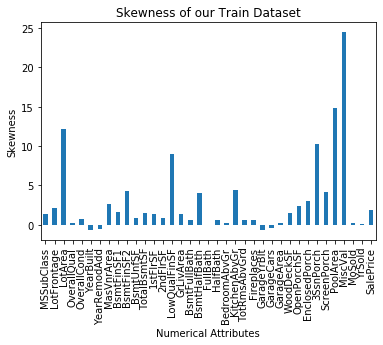

In [11]:
#Skew of Univariate Distribution
Train.skew().plot(kind='bar',)
plt.title('Skewness of our Train Dataset')
plt.ylabel("Skewness")
plt.xlabel("Numerical Attributes")

- So the above output shows that our data is skewed so we now have to transform them 

In [12]:
def get_cols_with_no_nans(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans    
    '''
    if (col_type == 'num'):#if its numerical
        predictors = df.select_dtypes(exclude=['object'])#dont put the objects(only numbers)
    elif (col_type == 'no_num'):#not a number 
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

So in the above function , its for giving us the attributes which are numeric and those which are categorical then at the end get the total which do not have NA or missing data
This will help us when encoding or when doing feature engineering, which attributes need to be encoded. 

In [13]:
#applying the above function
num_cols = get_cols_with_no_nans(Train , 'num')
cat_cols = get_cols_with_no_nans(Train , 'no_num')
ALLL=get_cols_with_no_nans(Train , 'all')

In [14]:
print ('Number of numerical columns with no nan values :',len(num_cols))# total of a numericals
print ('Number of non-numerical columns with no nan values :',len(cat_cols))#total of catagoricals
print ('Sum of columns with no nan values :',len(ALLL))# in all columns having no NAs

Number of numerical columns with no nan values : 34
Number of non-numerical columns with no nan values : 27
Sum of columns with no nan values : 61


The above output tells us that we have 34 numerics with no NA and 27 categoricals with no NAs and in total we will use 61 attributes for our algorithm since we cannot work with NAs 

In [15]:
num_cols# so we know the attributes which are numerics

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [16]:
cat_cols# knowing the categorical attributes so we know which one to encode

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

# Dealing with NAs in our dataset
- Working with NAs is not good for machine learning so what we have to do is either fill them with the mean or median in that attribute 

- The difference is that in NA it means they could not find information on that attribute so that is not good hence we shall replace it with None or 0 which means this is there but does not qualify for that threshold , for example, if I am looking for houses with 4+ rooms and I get a house with 3 rooms (maybe I was not sure whether on whether to classify something is a room or not), putting NA would mean I could not count the number of rooms, but putting zero or None would mean that house couldnt qualify for the given threshold which is 4+.

In [17]:
#Checking for attributes with NA in them then go check on our text description what each attribute mean then take it from there
pd.DataFrame.isna(Train)
nan_values = Train.isna()
nan_columns = nan_values.any()

columns_with_nan = Train.columns[nan_columns].tolist()
print(columns_with_nan)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


- The above are the columns that have NAs so we shall try and replace them in a way that was mentioned above

In [18]:
#LotFrontage
Train["LotFrontage"] = Train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [19]:
#Alley
Train["Alley"] = Train["Alley"].fillna("None")

In [20]:
#MasVnrType
Train["MasVnrType"] = Train["MasVnrType"].fillna("None")

In [21]:
#MasVnrArea
Train["MasVnrArea"] = Train["MasVnrArea"].fillna(0)

In [22]:
#MSZoning 
Train['MSZoning'] = Train['MSZoning'].fillna(Train['MSZoning'].mode()[0])

In [23]:
#Functionality
Train["Functional"] = Train["Functional"].fillna("Typ")

In [24]:
#Electrical
Train['Electrical'] = Train['Electrical'].fillna(Train['Electrical'].mode()[0])

In [25]:
#Kitchen Quality
Train['KitchenQual'] = Train['KitchenQual'].fillna(Train['KitchenQual'].mode()[0])

In [26]:
Train['Exterior1st'] = Train['Exterior1st'].fillna(Train['Exterior1st'].mode()[0])
Train['Exterior2nd'] = Train['Exterior2nd'].fillna(Train['Exterior2nd'].mode()[0])

In [27]:
#Saletype
Train['SaleType'] = Train['SaleType'].fillna(Train['SaleType'].mode()[0])

In [28]:
#Mssubclass
Train['MSSubClass'] = Train['MSSubClass'].fillna("None")

In [29]:
#PoolQC
Train["PoolQC"] = Train["PoolQC"].fillna("None")

In [30]:
#MiscFeature 
Train["MiscFeature"] = Train["MiscFeature"].fillna("None")

In [31]:
#Fence
Train["Fence"] = Train["Fence"].fillna("None")

In [32]:
for columns in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',"FireplaceQu"):
    Train[columns] = Train[columns].fillna('None')

In [33]:
for columns in ('BsmtFinSF1', 'BsmtFinSF2','GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    Train[columns] = Train[columns].fillna(0)

In [34]:
Train['SaleType'] = Train['SaleType'].fillna(Train['SaleType'].mode()[0])

In [35]:
Train['Utilities'] = Train['Utilities'].fillna(Train['Utilities'].mode()[0])

In [36]:
pd.DataFrame.isna(Train)
nan_values = Train.isna()
nan_columns = nan_values.any()

columns_with_nan = Train.columns[nan_columns].tolist()
print(columns_with_nan)

[]


- So now in the above code we have confirmed that our Train dataset has been cleared of all the NAs we had 
- So as you will see that where we were filling , we would fill with the mode , median or the None and others the Typ
- 'None' - we would use this if we have 'No' in our description text or when that attribute is negative
- Use the mode when ever we have few 'NAs' in our dataset so we would subsitute the 'NA' with the most appearing figure in that attribute
- 'Typ' when its given in the description that NA means Typical
- So where we filled with a median , the reason is that we suspect that the neighbourhood will probably be similar to that hose , for example if its a suburb , the house will be more expensive since its in a suburb.In short , the areas in those houses in that suburb is likely going to be same.

In [37]:
#Train.shape

In [38]:
Train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,4,2010,WD,Normal,142125


- indeed there no NAs in our dataset

# Visualization
- so here we shall only deal with the numeric attributes in order to see how they are distributed and how are they correlated with each other.

<function matplotlib.pyplot.show(*args, **kw)>

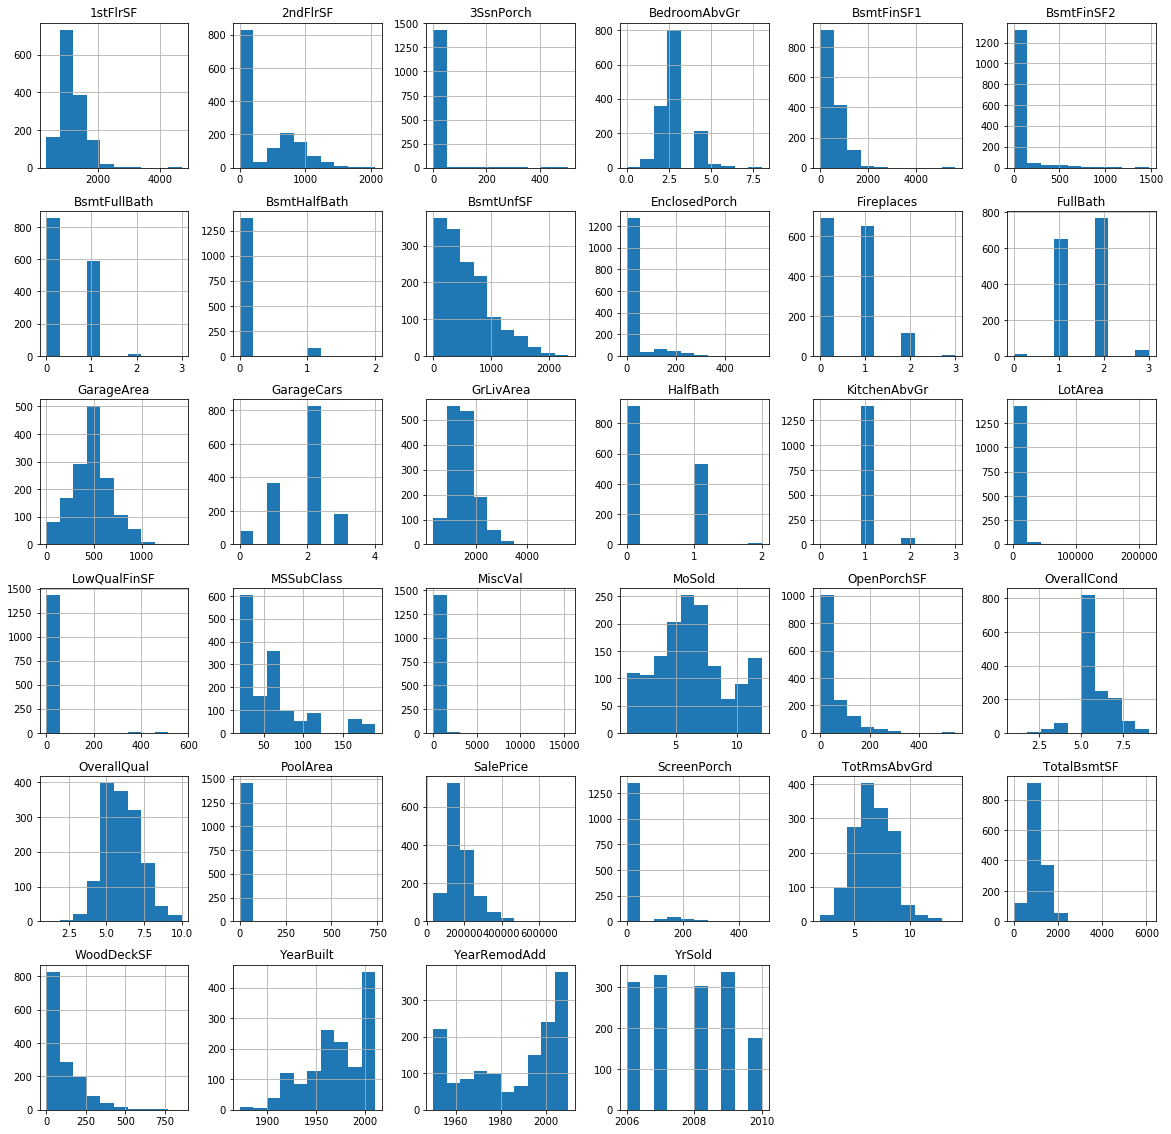

In [39]:
# Univariate(HISTOGRAM)
Numerics=Train[num_cols]
Numerics.hist(figsize=(20,20))
plt.show

- For the SalePrice we will not see any plot because there is no distribution because there are many different numbers so hence nothing will be seen

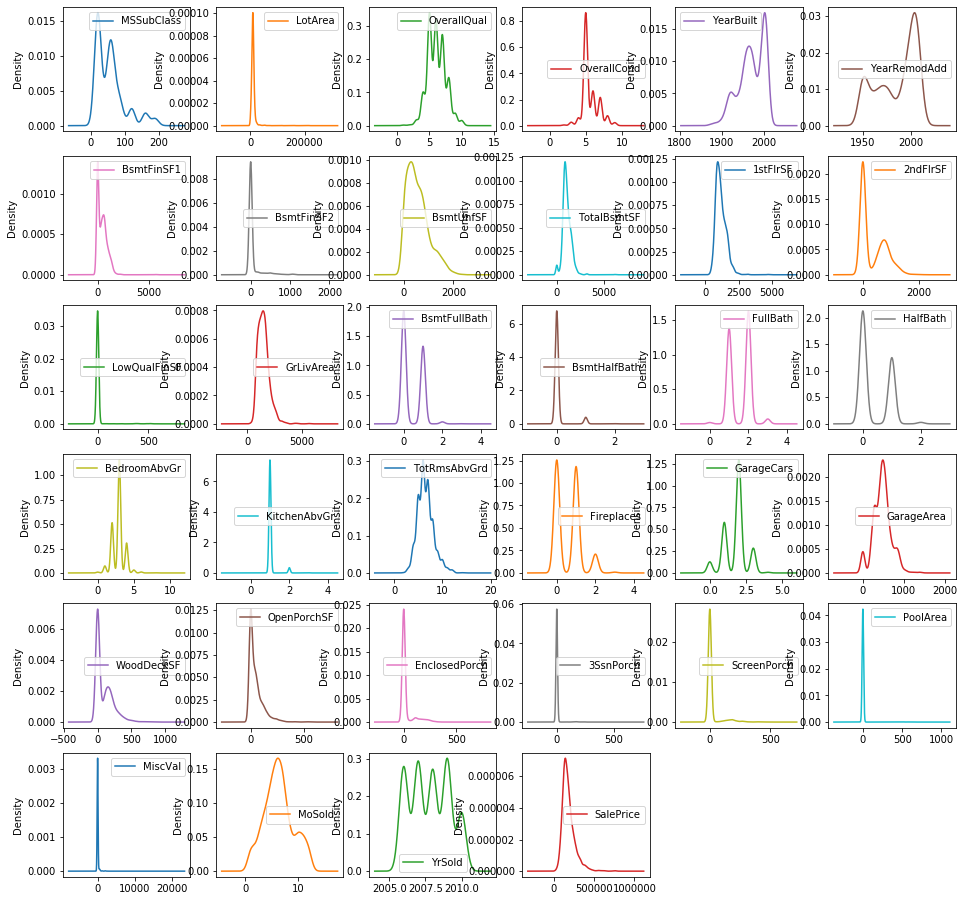

In [40]:
# To see how they are distributed:
Numerics.plot(kind='density',subplots=True, layout=(6,6), sharex=False, sharey=False,figsize=(16,16))
plt.show()# still in the presentation of the attributes , some data are not normally distributes and some are normally distributed

Text(0.5, 1, 'Correlation of the Attributes')

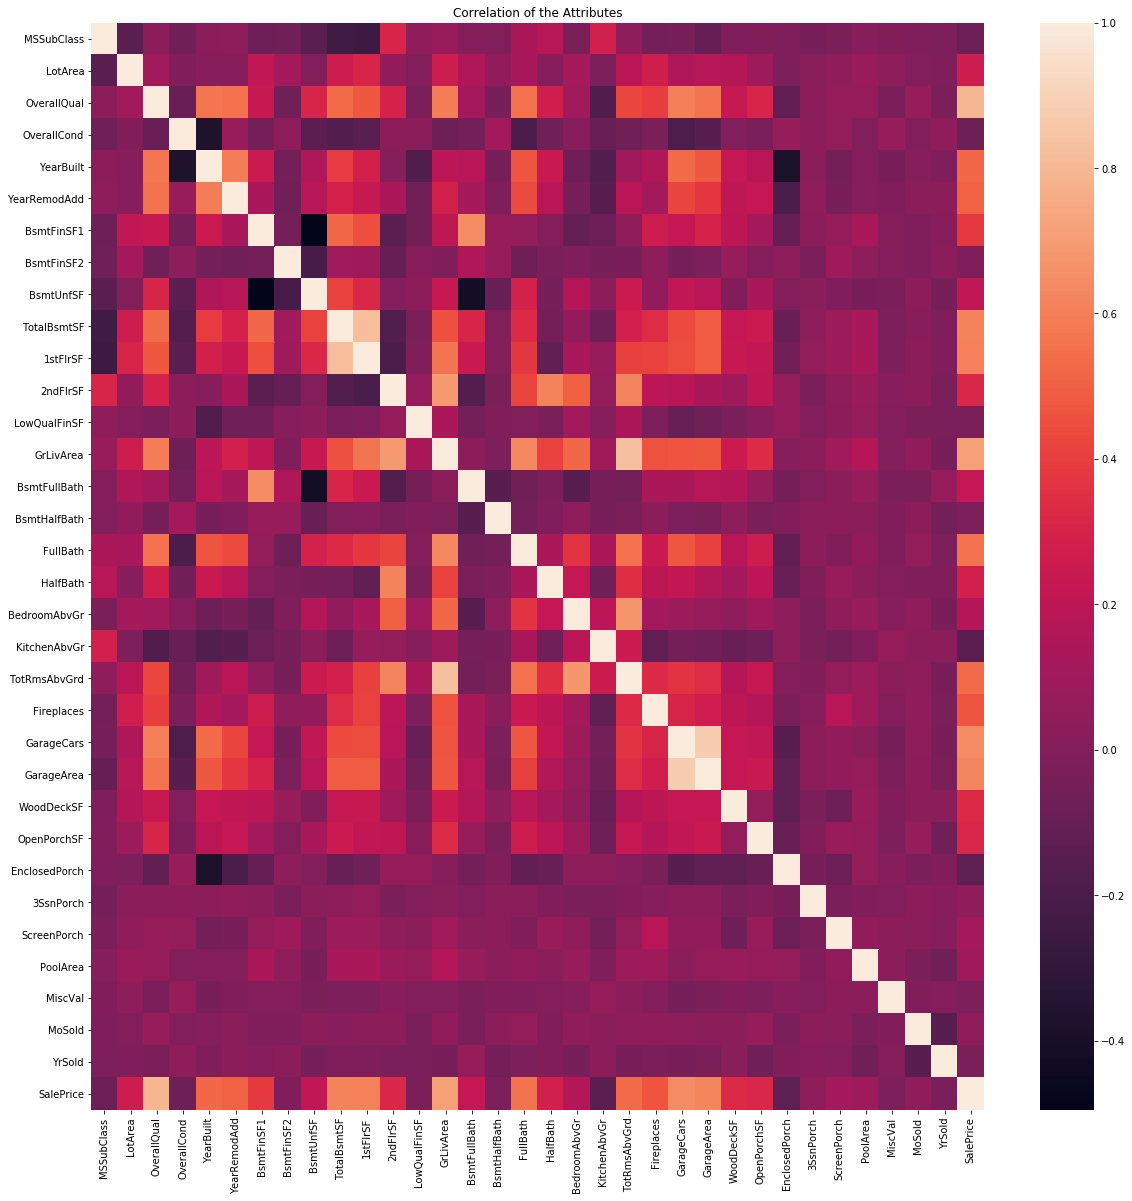

In [41]:
# Multivariate distribution(How they are correlated)
plt.figure(figsize=(20,20))
sns.heatmap(Numerics.corr(method='pearson'))#to check how much is the correlation between the attributes
plt.title("Correlation of the Attributes")

- So from the above output , we can see that , a few attributes are positively correalted(Garage Cars and Garage Area,GrLivArea and TotRmsAbvGrd)

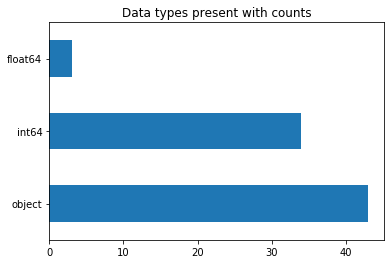

In [42]:
#checking the counts datatypes
Train.dtypes.value_counts().plot(kind='barh')
plt.title('Data types present with counts')
plt.show()

- This is where we view the proportion of our data types in the train dataset and we can tell that we have more objects and less floats.

# Target Correlation
- So now as we know not all features are important given the target , so now we going to have a heat map of the first 14 features that are highly correlated with our target which is SalePrice

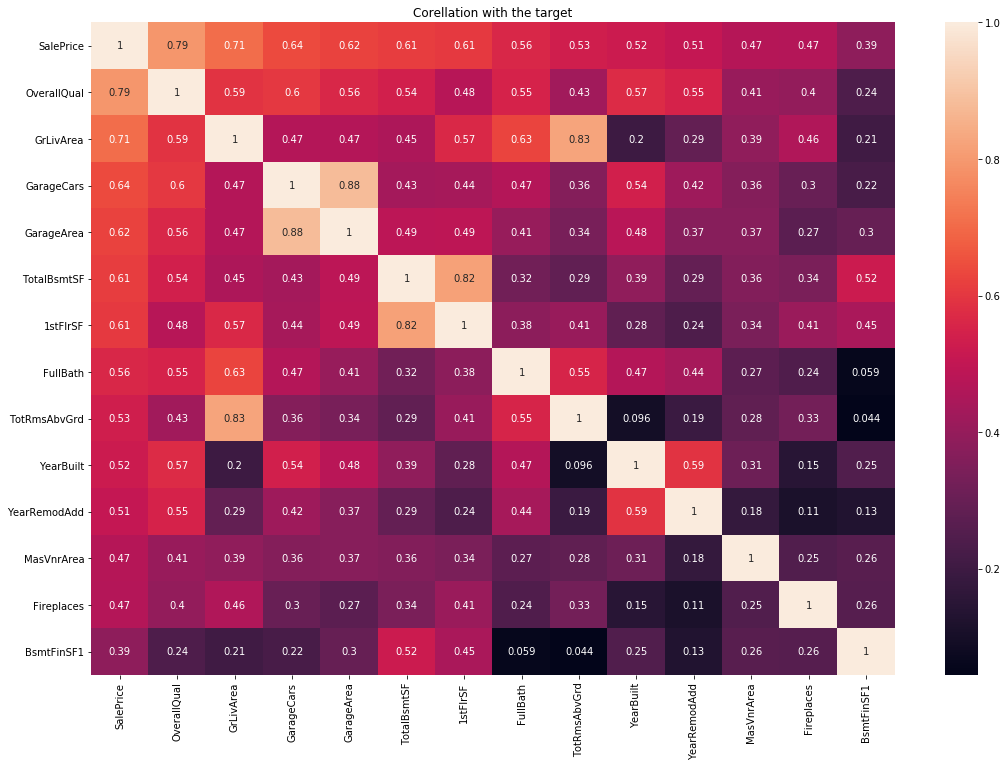

In [43]:
SalePriceCorr = Train.corr().nlargest(14,'SalePrice')['SalePrice'].index
f , ax = plt.subplots(figsize = (18,12))
ax = sns.heatmap(Train[SalePriceCorr].corr(), annot=True)
plt.title("Corellation with the target")
plt.show()

# Attributes relation with the target(SalePrice)
- so now we will see which of the attributes are more correlated with our target, this will help us see how many outliers we have that may cause some problems in our network , but we should not remove all the outliers because our network might find problems in the test data (however, we ended up not removing the outliers at all because removing outliers in the train would mean you have to do that in the test set too, but the problem was we had less records above the threshold that we had used in the train dataset to remove the ouliers, presenting us with different rows for the two datasets, hence the machine could not run because of the differences in the records)
- looking from our above heat map , we can see that the are certain features which are more correlated with the SalePrice,(OverallQual,GrLivArea,GarageCars,GarageArea)
- so because we have ,GrLivArea,GarageCars,GarageArea all talking about the garage we shall take one representative for all.

- So judging from our ouput in which our maximum is 1 , a correlation closer to one is considered to be more correlated , so we can see from the top left corner that that is where most of the correlation with the SalePrice(OverallQual, GrLivArea , GarageCars , GarageArea and TotalBsmtSF) is.
- We do have other highly correlated features against themselves,(GarageCars and GarageArea- For the car to get into the garage , it has to fit in the available area)

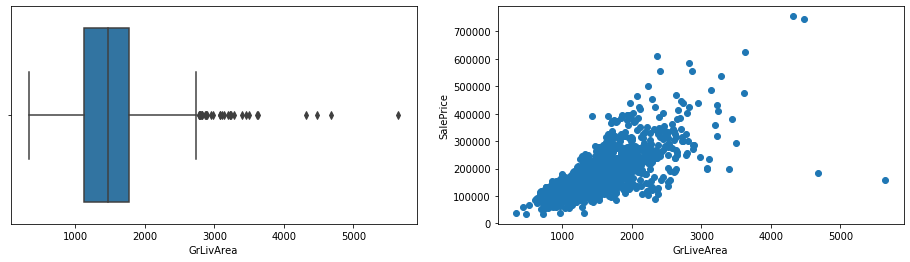

In [44]:
#plots for garage correlation with the target
figure,ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(Train['GrLivArea'],ax=ax[0])
plt.scatter(Train['GrLivArea'],Train['SalePrice'])
plt.xlabel('GrLiveArea')
plt.ylabel('SalePrice')
plt.show()

- So this is how it is presented, for the boxplot we can see that there are atleast 4 outliers and even in the relation with the SalePrice , they are seen.
- So we will deal with them by setting a threshold so that we can get rid of the outliers so first we shall set it at 4000 to get rid of them and see what happens. (As mentioned before, we ended up not doing this because of the problems encountered)

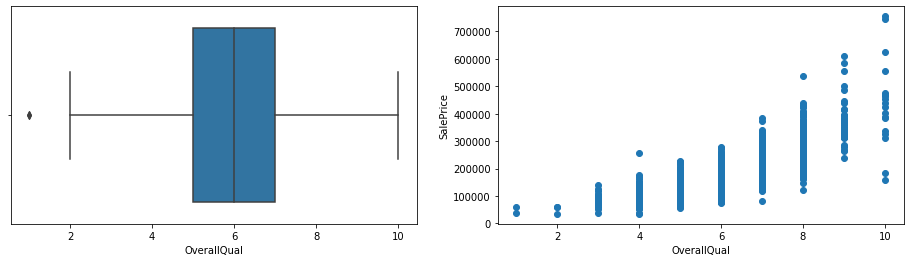

In [45]:
#plot for overallqual correlation with target
figure,ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(Train['OverallQual'],ax=ax[0])
plt.scatter(Train['OverallQual'],Train['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

- So from the output above , we can tell that we have one outlier from the box plot, and the relation with the SalePrice is a catagorical one so we not seeing any scatters.

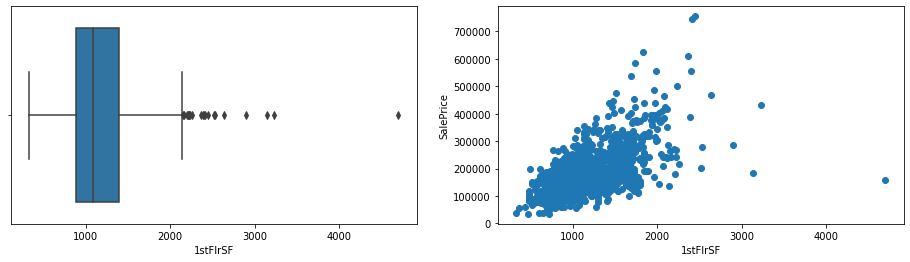

In [46]:
#correlation of 1stflrSF with sale price
figure,ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(Train['1stFlrSF'],ax=ax[0])
plt.scatter(Train['1stFlrSF'],Train['SalePrice'])
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.show()

- Since our TotalBsmtSF and 1stFlrSF are related so we had to plot one between the two

In [47]:
Train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,4,2010,WD,Normal,142125


# Numerical attributes relation with the target

In [48]:
#creating a variable which will contain the numerical columns without NAs
Numerics=Train[num_cols]
Numerics#our new dataframe having only numerics

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


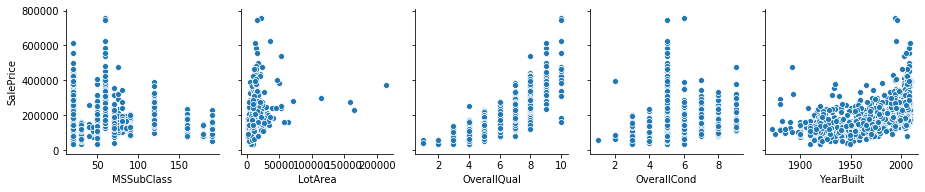

In [49]:
#Plots
plt.rcParams['figure.figsize']=(10,10)
pp=sns.pairplot(data=Numerics,
                  y_vars=['SalePrice'],
                  x_vars=['MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt'])

- MSSubClass- shows that its a catagorical feature
- OverallQual, OverallCond - ordered

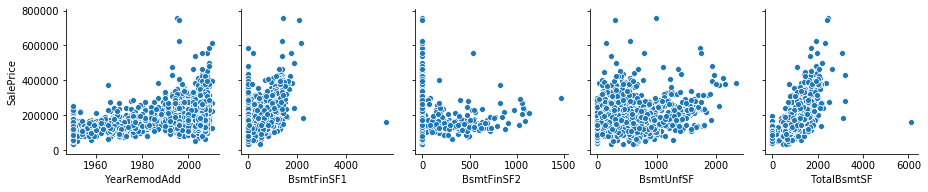

In [50]:
plt.rcParams['figure.figsize']=(10,10)
pp=sns.pairplot(data=Numerics,
                  y_vars=['SalePrice'],
                  x_vars=['YearRemodAdd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'])

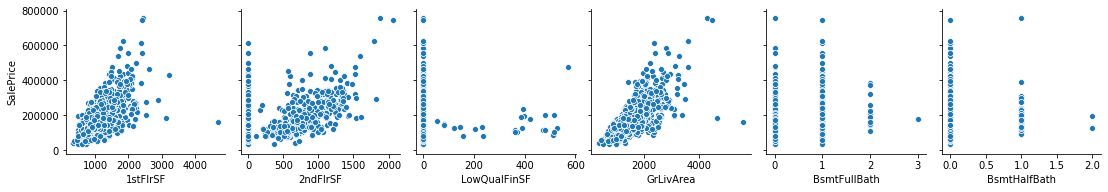

In [51]:
plt.rcParams['figure.figsize']=(10,10)
pp=sns.pairplot(data=Numerics,
                  y_vars=['SalePrice'],
                  x_vars=['1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath'])

- BsmtFullBath,BsmtHalfBath - discrete value# finite number 

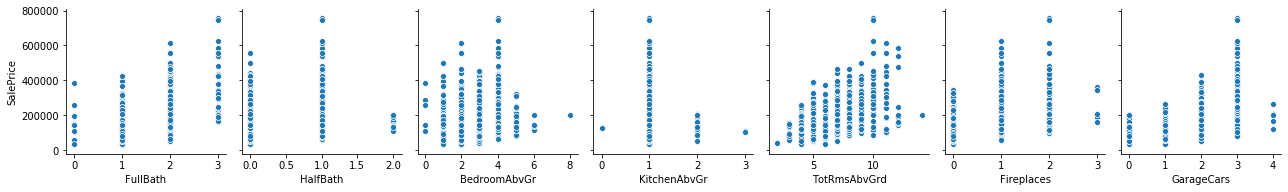

In [52]:
plt.rcParams['figure.figsize']=(10,10)
pp=sns.pairplot(data=Numerics,
                  y_vars=['SalePrice'],
                  x_vars=['FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars'])

- FullBath,HalfBath,Fireplaces,BedroomAbvGr,KitchenAvbGr - discrete value

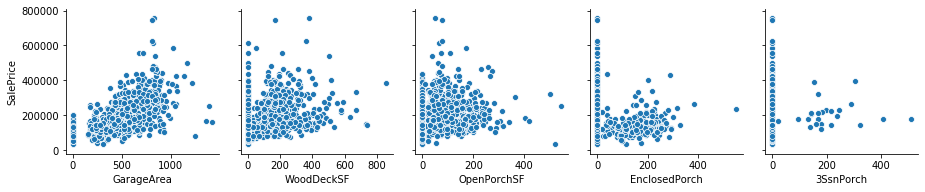

In [53]:
plt.rcParams['figure.figsize']=(10,10)
pp=sns.pairplot(data=Numerics,
                  y_vars=['SalePrice'],
                  x_vars=['GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch'])

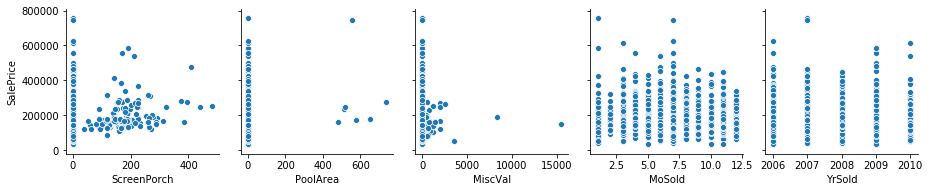

In [54]:
plt.rcParams['figure.figsize']=(10,10)
pp=sns.pairplot(data=Numerics,
                  y_vars=['SalePrice'],
                  x_vars=['ScreenPorch','PoolArea','MiscVal','MoSold', 'YrSold',])

- All the above outputs show how each of the variables corelate with the the target which is price(Although it may look redundant)

# Distribution of the Target(SalePrice)
- So for our network to be more precise in predicting, the target should be in normal distribution , not skewed. If it is skewed it will be biased, which is not ideal , so we shall try and solve the skewness with the functions: square root , cube root and logs. We shall choose one in this case , not all.

In [55]:
#imporring a library
from scipy.stats import skew,norm

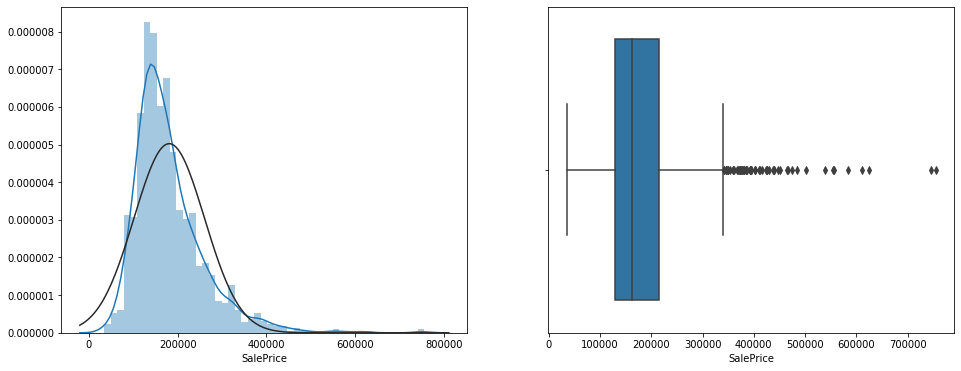

In [56]:
#Checking the skewness of our target
f,ax = plt.subplots(1,2,figsize=(16,6))
sns.distplot(Train['SalePrice'],fit=norm,ax=ax[0])
sns.boxplot(Train['SalePrice'])
plt.show()

- So from the output above , the boxplot shows some outliers and even the distribution is positively skewed on one side so we have to first deal with that in order to increase the accuracy in the price prediction.

- So we have to do some transformation as mentioned above using log transformation

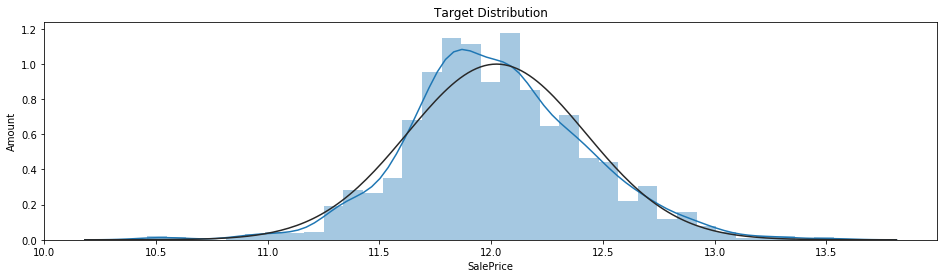

In [57]:
Transform = np.log1p(Train['SalePrice'])

f,ax = plt.subplots(1,figsize=(16,4))
sns.distplot(Transform,fit=norm)
plt.title('Target Distribution')
plt.ylabel("Amount")
plt.show()

- So from the above output we can tell that our target is now almost normally distributed which is a good thing for our model , decreasing biasness.

In [58]:
Train.shape

(1460, 80)

# Dealing with the skewness of the data
- Since working with skewed data is not good for machine learning because it might lead to biasness , so now we shall try and see if our data is skewed , if yes we transform it and if no we move on.

In [59]:
Train=Train.drop('SalePrice',axis=1)# dropping our target

In [60]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

Text(0, 0.5, 'Amount of skewness')

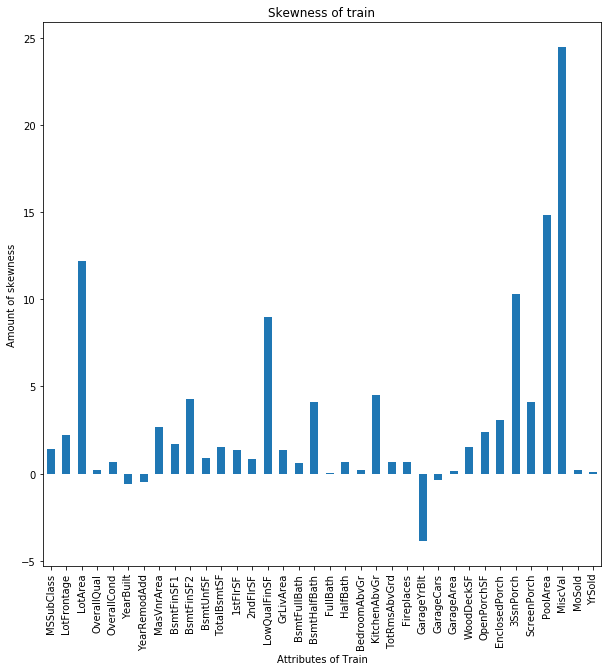

In [61]:
#checking skewness
Train.skew().plot(kind='bar')
plt.title("Skewness of train")
plt.xlabel('Attributes of Train')
plt.ylabel("Amount of skewness")

In [62]:
Numerics=Numerics.drop('SalePrice', axis=1)# dropping the target so its not corrected

In [63]:
#correcting the skewness
feature = Train[Numerics.columns].apply(lambda x: skew(x)).sort_values(ascending=False)

more = feature[feature > 0.5]
sk_index = more.index

In [64]:
for i in sk_index:
    Train[i] = boxcox1p(Train[i], boxcox_normmax(Train[i] + 1))

Text(0.5, 0, 'Attributes')

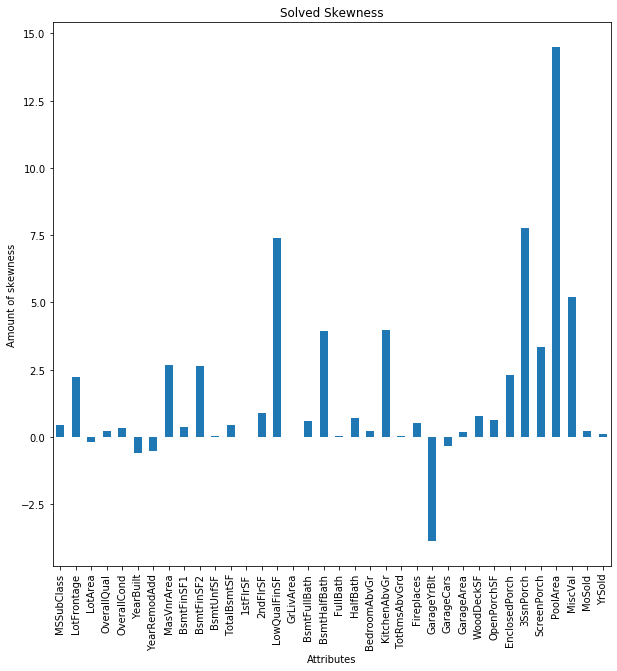

In [65]:
Train.skew().plot(kind='bar')# solved skewness
plt.title("Solved Skewness")
plt.ylabel("Amount of skewness")
plt.xlabel("Attributes")

- A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn't normal, applying a Box-Cox means that you are able to run a broader number of tests
- The procedure for the Box-Cox transformation is to find the value of λ between -5 and 5 that minimizes the standard deviation of the transformed data
- After solving for the skewness we can see that now our dataset has been normalized using the boxcox transformation which has been used mostly in literature

# Data Transformation
 - Since some data are catagorical but presented numerical , so that means they have no meaning at all but presented numerical , so hence they might affect our model , for example
 - Month sold has 1 for January and 12 for December , it doesnt neccesary means 1 is better than 12 so that might affect our network
 - Hence we will transform it to catagorical before encoding them with OneHotEncede

In [66]:
#MSSubClass=The building class
Train['MSSubClass'] = Train['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
Train['OverallCond'] = Train['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
Train['YrSold'] = Train['YrSold'].astype(str)
Train['MoSold'] = Train['MoSold'].astype(str)

# Encoding the categorical features

- Since in deep learning all the input and output should be in numeric, if we have categorical data , we have to encode it to numeric before we can fit and evaluate our model
- So it's either you integer encode or one hot encode, so we will stick to one hot encoding(where each label is mapped to a binary vector)
- One hot encode here because from our heat map , we can see that we only have 3 attributes related to each other , so the majority are not correlated so we do this one
- This method produces a lot of columns that slows down the learning significantly if the number of the category is very high for the feature.
- So all in all we want to change our categorical attributes to numerics in binary form


In [67]:
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)# overwrite that existing dataframe

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)# so after encoding, drop that column since we will have a new one , so we dont want redundancy
    return df

- So in the above function thats where we will encode 
- pd.get_ dummies-when applied to a column of categories where we have one category per observation will produce a new column (variable) for each unique categorical value. It will place a one in the column corresponding to the categorical value present for that observation

In [68]:
#Applying our defined function
colNames=Train.columns#defining the argument, colNames in the dataset
oht=oneHotEncode(Train,colNames)#applying the function
oht.shape

(1460, 339)

In [69]:
oht.head()


,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8.670457,7,2003,2003,196.0,118.098014,0.0,30.319786,252.446454,...,0,0,0,1,0,0,0,0,1,0
1,80.0,8.787629,6,1976,1976,0.0,147.125761,0.0,44.696309,342.556423,...,0,0,0,1,0,0,0,0,1,0
2,68.0,8.933084,7,2001,2002,162.0,91.750448,0.0,57.687341,267.178824,...,0,0,0,1,0,0,0,0,1,0
3,60.0,8.782837,7,1915,1970,0.0,52.861356,0.0,65.749912,228.937513,...,0,0,0,1,1,0,0,0,0,0
4,84.0,9.150119,8,2000,2000,350.0,112.267323,0.0,62.037603,317.335329,...,0,0,0,1,0,0,0,0,1,0


- So from the above output we can see that we have 339 columns instead of the 81 we had(pd.get_ dummies did that , added the number of columns with zero and ones

In [70]:
#Confirming the encoding
print('There were {} columns before encoding features'.format(Train.shape[1]))#before encoding the features
oht=oneHotEncode(Train,colNames)
print('There are {} columns after encoding  features'.format(oht.shape[1]))#after encoding


There were 79 columns before encoding features
There are 339 columns after encoding  features


In [71]:
oht.columns# columns after encoding

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=339)

In [72]:
pd.DataFrame.isna(oht)
nan_values = oht.isna()
nan_columns = nan_values.any()

columns_with_nan = oht.columns[nan_columns].tolist()
print(columns_with_nan)


[]


- in the above code ,we trying to see if in the attributes we now have , do we have any attributes with NAs.
- so in this we are clear of NAs

In [73]:
oht.shape# we have a new shape with 339

(1460, 339)

## Test Dataset Processing

In [74]:
Test=pd.read_csv('test.csv')# importing our test data set
Test.head(5)# get a glimpse of our test , how does it looks like

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [75]:
index=Test.Id
index# for the output of our csv,we making the ID the index since we are still going to encode and the Id will be distorted

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [76]:
print(Test.shape)
print(Train.shape)

(1459, 80)
(1460, 79)


In [77]:
Tnum_cols = get_cols_with_no_nans(Test , 'num')
Tcat_cols = get_cols_with_no_nans(Test , 'no_num')
TALLL=get_cols_with_no_nans(Test, 'all')

In [78]:
print ('Number of numerical columns with no nan values :',len(Tnum_cols))# total of a numericals
print ('Number of non-numerical columns with no nan values :',len(Tcat_cols))#total of catagoricals
print ('Sum of non-numerical columns with no nan values :',len(TALLL))# in all columns having no NAs


Number of numerical columns with no nan values : 26
Number of non-numerical columns with no nan values : 21
Sum of non-numerical columns with no nan values : 47


- We have 26 numerics and 21 catagoricals without NAs which is quite different from our test

## Checking attributes with NAs

In [79]:
#Checking for attributes with NA in them then go check on our tect description what does that mean then take it from there
pd.DataFrame.isna(Test)
nan_values = Test.isna()
nan_columns = nan_values.any()

columns_with_nan = Test.columns[nan_columns].tolist()
print(columns_with_nan)

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


## Replacing NAs in our test dataset

In [80]:
#LotFrontage
Test["LotFrontage"] = Test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
#Alley
Test["Alley"] = Test["Alley"].fillna("None")
#MasVnrType
Test["MasVnrType"] = Test["MasVnrType"].fillna("None")
#MasVnrArea
Test["MasVnrArea"] = Test["MasVnrArea"].fillna(0)
#MSZoning 
Test['MSZoning'] = Test['MSZoning'].fillna(Test['MSZoning'].mode()[0])
#Functionality
Test["Functional"] = Test["Functional"].fillna("Typ")
#Electrical
Test['Electrical'] = Test['Electrical'].fillna(Test['Electrical'].mode()[0])
Test['Exterior1st'] = Test['Exterior1st'].fillna(Test['Exterior1st'].mode()[0])
Test['Exterior2nd'] = Test['Exterior2nd'].fillna(Test['Exterior2nd'].mode()[0])
#Saletype
Test['SaleType'] = Test['SaleType'].fillna(Test['SaleType'].mode()[0])
#Mssubclass
Test['MSSubClass'] = Test['MSSubClass'].fillna("None")
#PoolQC
Test["PoolQC"] = Test["PoolQC"].fillna("None")
#MiscFeature 
Test["MiscFeature"] = Test["MiscFeature"].fillna("None")
#Fence
Test["Fence"] = Test["Fence"].fillna("None")
for columns in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',"FireplaceQu"):
    Test[columns] = Test[columns].fillna('None')
for columns in ('BsmtFinSF1', 'BsmtFinSF2','GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    Test[columns] = Test[columns].fillna(0)
Test['SaleType'] = Test['SaleType'].fillna(Test['SaleType'].mode()[0])
Test['KitchenQual'] = Test['KitchenQual'].fillna(Test['KitchenQual'].mode()[0])
Test['Utilities'] = Test['Utilities'].fillna(Test['Utilities'].mode()[0])

- So we have now replaced the NAs in the test the exact same way we did with our Train , everything is explained in the Train 

In [81]:
# Testing for NAs and we no longer have them
pd.DataFrame.isna(Test)
nan_values = Test.isna()
nan_columns = nan_values.any()

columns_with_nan = Test.columns[nan_columns].tolist()
print(columns_with_nan)

[]


In [82]:
print(Test.shape)
print(Train.shape)

(1459, 80)
(1460, 79)


Solving for skewness in our test the exact way we did with the train

In [83]:
t_numeric=Test[Tnum_cols]
feature = Test[t_numeric.columns].apply(lambda x: skew(x)).sort_values(ascending=False)

more = feature[feature > 0.5]
sk_index = more.index

In [84]:
for i in sk_index:
    Test[i] = boxcox1p(Test[i], boxcox_normmax(Test[i] + 1))

Text(0, 0.5, 'Amount of skewness')

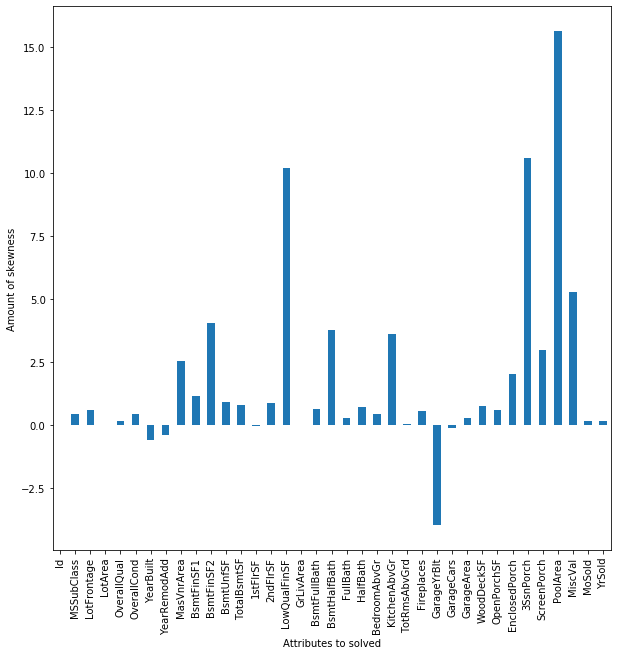

In [85]:
Test.skew().plot(kind='bar')# solved skewness
plt.xlabel('Attributes to solved')
plt.ylabel("Amount of skewness")

Th output shows that we have solved the skewness to avoid biasness

# Data Transformation of Test

In [86]:
#MSSubClass=The building class
Test['MSSubClass'] = Test['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
Test['OverallCond'] = Test['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
Test['YrSold'] = Test['YrSold'].astype(str)
Test['MoSold'] = Test['MoSold'].astype(str)

# Encoding the categorical features in our Test

In [87]:
#Applying our defined function
colNames=Test.columns#defining the argument, colNames in the dataset
Test_hot=oneHotEncode(Test,colNames)#applying the function
Test_hot.shape

(1459, 323)

In [88]:
Test_hot.shape# our new diminsion after encoding

(1459, 323)

In [89]:
oht.shape# our train after encoding

(1460, 339)

## Checking for NAs in our Test dataset

In [90]:
# Looking for NAs in our Test_hot
pd.DataFrame.isna(Test_hot)
nan_values = Test_hot.isna()
nan_columns = nan_values.any()

columns_with_nan = Test_hot.columns[nan_columns].tolist()
print(columns_with_nan)


[]


In [91]:
type(oht)# checking for the type after encoding to help in the following step

pandas.core.frame.DataFrame

In [92]:
type(Test_hot)

pandas.core.frame.DataFrame

 So after the different in shapes which is in machine learning , the train set should be exactly the same with the test set yet in our case after encoding it was not the case , hence we have to figure out a way around that.
We had to use a function as described below in order to look for common columns that are in both dataframes so we can use them hence the other columns are dropped for our network. 
We had to put them in a variable which is in a way we had to extract the columns in the test and train dataset as seen below

In [93]:
both=oht.columns & Test_hot.columns #looking for columns that are both in the 2 dataframes
oht[both]

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8.670457,7,2003,2003,196.0,118.098014,0.000000,30.319786,252.446454,...,0,0,0,1,0,0,0,0,1,0
1,80.0,8.787629,6,1976,1976,0.0,147.125761,0.000000,44.696309,342.556423,...,0,0,0,1,0,0,0,0,1,0
2,68.0,8.933084,7,2001,2002,162.0,91.750448,0.000000,57.687341,267.178824,...,0,0,0,1,0,0,0,0,1,0
3,60.0,8.782837,7,1915,1970,0.0,52.861356,0.000000,65.749912,228.937513,...,0,0,0,1,1,0,0,0,0,0
4,84.0,9.150119,8,2000,2000,350.0,112.267323,0.000000,62.037603,317.335329,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,8.610573,6,1999,2000,0.0,0.000000,0.000000,92.226289,274.688085,...,0,0,0,1,0,0,0,0,1,0
1456,85.0,9.077729,6,1978,1988,119.0,127.405893,8.337800,69.251671,400.974796,...,0,0,0,1,0,0,0,0,1,0
1457,66.0,8.732656,7,1941,2006,0.0,62.328751,0.000000,87.783189,318.859460,...,0,0,0,1,0,0,0,0,1,0
1458,68.0,8.798746,5,1950,1996,0.0,18.905205,13.765846,0.000000,302.643022,...,0,0,0,1,0,0,0,0,1,0


In [94]:
test_new=Test_hot[both]# making our variable which is test new, extracting the common columns

In [95]:
train_new=oht[both]# our new train

In [96]:
test_new# our new test set for the columns both in the train and test

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,80.0,50.728198,5,1961,1961,0.0,468.0,144.0,270.0,882.0,...,0,0,0,1,0,0,0,0,1,0
1,81.0,54.118581,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,...,0,0,0,1,0,0,0,0,1,0
2,74.0,53.590852,5,1997,1998,0.0,791.0,0.0,137.0,928.0,...,0,0,0,1,0,0,0,0,1,0
3,78.0,48.336772,6,1998,1998,20.0,602.0,0.0,324.0,926.0,...,0,0,0,1,0,0,0,0,1,0
4,43.0,38.773081,8,1992,1992,0.0,263.0,0.0,1017.0,1280.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,28.433239,4,1970,1970,0.0,0.0,0.0,546.0,546.0,...,0,0,0,1,0,0,0,0,1,0
1455,21.0,28.227211,4,1970,1970,0.0,252.0,0.0,294.0,546.0,...,0,0,0,1,1,0,0,0,0,0
1456,160.0,60.173276,5,1960,1996,0.0,1224.0,0.0,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,62.0,49.036704,5,1992,1992,0.0,337.0,0.0,575.0,912.0,...,0,0,0,1,0,0,0,0,1,0


In [97]:
train_new# our new train for the columns in both dataframes

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8.670457,7,2003,2003,196.0,118.098014,0.000000,30.319786,252.446454,...,0,0,0,1,0,0,0,0,1,0
1,80.0,8.787629,6,1976,1976,0.0,147.125761,0.000000,44.696309,342.556423,...,0,0,0,1,0,0,0,0,1,0
2,68.0,8.933084,7,2001,2002,162.0,91.750448,0.000000,57.687341,267.178824,...,0,0,0,1,0,0,0,0,1,0
3,60.0,8.782837,7,1915,1970,0.0,52.861356,0.000000,65.749912,228.937513,...,0,0,0,1,1,0,0,0,0,0
4,84.0,9.150119,8,2000,2000,350.0,112.267323,0.000000,62.037603,317.335329,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,8.610573,6,1999,2000,0.0,0.000000,0.000000,92.226289,274.688085,...,0,0,0,1,0,0,0,0,1,0
1456,85.0,9.077729,6,1978,1988,119.0,127.405893,8.337800,69.251671,400.974796,...,0,0,0,1,0,0,0,0,1,0
1457,66.0,8.732656,7,1941,2006,0.0,62.328751,0.000000,87.783189,318.859460,...,0,0,0,1,0,0,0,0,1,0
1458,68.0,8.798746,5,1950,1996,0.0,18.905205,13.765846,0.000000,302.643022,...,0,0,0,1,0,0,0,0,1,0


In [98]:
np.random_seed=42# setting our random be at 42 for consistency

# Making the Deep neural Network

In [99]:
def baseline_model():
    model=Sequential()
    #input layer
    model.add(Dense(236, kernel_initializer='normal',input_dim=train_new.shape[1], activation='relu'))

    #hidden layers
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    #the output layer
    model.add(Dense(output_dim=1, kernel_initializer='normal'))
    #Compile the network
    model.compile(loss='mean_absolute_error',optimizer='adam', metrics=['mean_absolute_error'])
    model.summary()
    return model

- So we will have it in a function
- our model will be Sequential model (Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer. Each layer has weights that correspond to the layer the follows it. We use the 'add()' function to add layers to our model.)
- So in deep learning we have 3 layers, input, hidden and outpu layer
- #1- Input layer- this is the first layer with 236 neurons in this case(The input layer is responsible for receiving the inputs. ), having the input dimension be the number of rows of our New_data with the activation function being the relu.
 - Relu-Rectified Linear Unit (ReLU)The rectified linear activation function is a piecewise linear function that will output the input directly if is positive, otherwise, it will output zero,  usually the best activation function to start with
 - kernel initializor-the neural network needs to start with some weights and then iteratively update them to better values. The term kernel_initializer is a fancy term for which statistical distribution or function to use for initialising the weights 
- #2 - Hidden layer so we had 3 hidden layers- adding more neurons between the input and output(The neurons simply calculate the weighted sum of inputs and weights, add the bias and execute an activation function.). More hidden layers, slower the network.
- #3 - Output layer- the last layer that brings out the output , always one.The output layer takes in the inputs which in this case are from the hidden layers which are passed in from the layers before it, performs the calculations via its neurons and then the output is computed. No activation function is used for the output layer because it is a regression problem and we are interested in predicting numerical values directly without transform.
- adam optimizer- The method computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients.
- then our loss and metric is the mean absolute error which is good according to literature.


# Model Evaluation


In [100]:
TARGET=pd.read_csv('train.csv')# importing our train data inorder to get the target which is the Saleprice
target = TARGET.SalePrice#making our SalePrice the target
#Train.drop(['SalePrice'],axis = 1 , inplace = True)#Dropping it here


So before we evaluate our network , we have to first set our target which,in this case , is the SalePrice which is how we have set it in this case .

In [101]:
#Evaluate model
estimator=KerasRegressor(build_fn=baseline_model, epochs=15, batch_size=5, verbose=0)#15 iterations
kfold=KFold(n_splits=10)
results=cross_val_score(estimator,train_new,target, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 236)               70328     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               60672     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 262,841
Trainable params: 262,841
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)              

# So since its a regression problem , we use KerasRegressor as our estimator(Keras Wrapper)
- epochs- An epoch is one complete presentation of the data set to be learned to a learning machine( entire dataset passed foward and backward through the nueral network so here its 15 times)
- Batch size- total number of training examples present so here is 5

# Interpretation
So from our output we have a mean which is 25140.95(dont mind about the - sign , its how keras works, its for maximization instead of minimization so we tend to ignore it
- And we have our MSE which is 5922.43 which is not that bad given the mean , so that how much the deviation is from the mean , which is average prediction error.

# Trying other models


## 1. Random Tree Regressor
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting
So here even our mean absolute error is way more less than the Mean which is not a bad thin

In [102]:
#Random tree Regressor
train_X, val_X, train_y, val_y = train_test_split(train_new, target, test_size = 0.25, random_state = 14)
modelR = RandomForestRegressor()
modelR.fit(train_X,train_y)

# Get the mean absolute error on the validation data
predicted_prices = modelR.predict(val_X)
MAE = mean_absolute_error(val_y , predicted_prices)
Mean=predicted_prices.mean()

print('Random forest validation Mean = ', Mean)
print('Random forest validation MAE = ', MAE)

Random forest validation Mean =  183342.59479452056
Random forest validation MAE =  17400.157205479456


This model gave us an output of mean of 183267.14265753425  and a Mean Absolute Error of 17367.728410958905


## 2. Ridge
- Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. When multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from
the true value. 
- By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors.
- It is hoped that the net effect will be to give estimates that are more reliable.

In [103]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(train_X,train_y)

# Get the mean absolute error on the validation data
ridge_prices = ridge.predict(val_X)
MAE = mean_absolute_error(val_y , ridge_prices)
Mean=ridge_prices.mean()

print('Ridge validation Mean = ', Mean)
print('Ridge validation MAE = ', MAE)

Ridge validation Mean =  183296.86009092696
Ridge validation MAE =  19198.210368257227


This model gave us an output of mean of 183296.86009092696 and a Mean Absolute Error of 19198.210368257227

## 3. Light GBM 
Light GBM is a gradient boosting framework that uses tree based learning algorithm.
Same case but our error has increased as compared to the Random Forest

In [104]:
#Using LBM regressor
from lightgbm import LGBMRegressor
LGBModel = LGBMRegressor()
LGBModel.fit(train_X,train_y , verbose=False)

# Get the mean absolute error on the validation data :
LGBMpredictions = LGBModel.predict(val_X)
MAE = mean_absolute_error(val_y , LGBMpredictions)
Mean=LGBMpredictions.mean()

print('LGBMBoost validation Mean = ',Mean)
print('LGBMBoost validation MAE = ',MAE)

LGBMBoost validation Mean =  181280.67883023917
LGBMBoost validation MAE =  16406.1105277031


This model gave us an output of mean of 181280.67883023917 and a Mean Absolute Error of 16406.1105277031

## 4. XGBRegressor
- XGBoost stands for eXtreme Gradient Boosting.
- The name xgboost, though, actually refers to the engineering goal to push the limit of computations resources for boosted tree algorithms.
 - XGBoost is an implementation of gradient boosted decision trees designed for speed and performance

In [105]:
#Using XGB regressor
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(train_X,train_y , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(val_X)
MAE = mean_absolute_error(val_y , XGBpredictions)
Mean=XGBpredictions.mean()

print('XGBoost validation Mean = ',Mean)
print('XGBoost validation MAE = ',MAE)

XGBoost validation Mean =  181926.05
XGBoost validation MAE =  18085.085124143836


This model gave us an output of mean of 181926.05 and a Mean Absolute Error of 18085.085124143836

## 5. Linear Regressor
- It's a Supervised Learning algorithm which goal is to predict continuous, numerical values based on given data input. ... Linear Regression tries to find parameters of the linear function, so the distance between the all the points and the line is as small as possible.

In [106]:
from sklearn.linear_model import LinearRegression
Linear = LinearRegression()
Linear.fit(train_X,train_y)

# Get the mean absolute error on the validation data :
Linearpredictions = Linear.predict(val_X)
MAE = mean_absolute_error(val_y , Linearpredictions)
Mean=Linearpredictions.mean()

print('Linear validation Mean = ',Mean)
print('Linear validation MAE = ',MAE)

Linear validation Mean =  183381.26040801642
Linear validation MAE =  21098.88450831071


This model gave us an output of mean of 183381.26040801642 and a Mean Absolute Error of 21098.88450831071

## 6. Lasso
Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters

In [107]:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso.fit(train_X,train_y)

# Get the mean absolute error on the validation data :
Lassopredictions = Lasso.predict(val_X)
MAE = mean_absolute_error(val_y , Lassopredictions)
Mean=Lassopredictions.mean()

print('Lasso validation Mean = ',Mean)
print('Lasso validation MAE = ',MAE)

Lasso validation Mean =  183058.00933075868
Lasso validation MAE =  20490.085886608864


This model gave us an output of mean of 183058.00933075868 and a Mean Absolute Error of 20490.085886608864

# Conclusion
- From our models we can tell see that Random Forest and LGBM has a less Mean Absolute Error compared to the other models in the Train dataset, but we shall try all of them in our test dataset to see how they work.

# Modelling the Standardized Dataset
- so because the input attriutes all vary in thier scales because they measure different quantities
- We can re-evaluate the same model using a standardized version of our data set
- use the Pipeline framework to perform the standardazation during the model evaluation process, within each fold of the cross validation fold into the training data

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [109]:
#standardizing our dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=15, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, train_new, target, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 236)               70328     
_________________________________________________________________
dense_52 (Dense)             (None, 256)               60672     
_________________________________________________________________
dense_53 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_54 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 257       
Total params: 262,841
Trainable params: 262,841
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_12"
_________________________________________________________________
Layer (type)            

The code above creates a scikit-learn Pipeline that first standardizes the dataset then creates and evaluate the baseline neural network model
- we are trying to decrease our MSE
- indeed our MSE is decreasing compared to our previous Sequential model(NB: Check the previous function)

# Tuning The Neural Network Topology
- Here we are optimizing some of the concerns for our model
- maybe the problem is the structure of the network itself , including the number of layers and the number of neurons in each layer
-  Still we are improving our model

# Evaluate a Deeper Network Topology
- Here what we are trying to do is to add the number of layers.
- Allowing the model to extract and recombine higher order features embedded in the data.
- But remember we can only add the number of hidden layers not the output or input layer so here we can only add hidden layers, so maybe we can add 2 and see how will be the effect.With the same number of neurons though

In [110]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(236, kernel_initializer='normal',input_dim=train_new.shape[1], activation='relu'))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(output_dim=1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [111]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=15, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, train_new, target, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Larger: -1264721147.96 (682811207.04) MSE


# Evaluate a Wider Network Topology
- Here here we are going to create a wider network
- we evaluate the effect of keeping a shallow network architecture and nearly doubling the number of neurons in the one hidden layer.which is from 236 to 255
- we shall have another function for the wider model

In [112]:
def wider_model():
    # create model 
    model = Sequential()
    model.add(Dense(255, kernel_initializer='normal',input_dim=train_new.shape[1], activation='relu'))
    model.add(Dense(output_dim=1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [113]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=15, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, train_new, target, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -15465096074.78 (2120767707.84) MSE


# Preparing the outputs 

In [114]:
Test=pd.read_csv('test.csv')# importing our test data set

In [115]:
print(train_new.shape)
print(test_new.shape)

(1460, 297)
(1459, 297)


In [116]:
#Linear
predict=Linear.predict(test_new)
predict
LINEAR=pd.DataFrame(predict, index=index)
LINEAR.columns=["SalePrice"]
LINEAR.head()
LINEAR.to_csv('Linear.csv')

In [117]:
#XGB
xgbpredict=XGBModel.predict(test_new)
xgbpredict
xgb=pd.DataFrame(xgbpredict, index=index)
xgb.columns=["SalePrice"]
xgb.head()
xgb.to_csv('xgb.csv')

In [118]:
#lbm
lbpredict=LGBModel.predict(test_new)
lbpredict
lbm=pd.DataFrame(lbpredict, index=index)
lbm.columns=["SalePrice"]
lbm.head()
lbm.to_csv('lbm.csv')

In [119]:
#Ridge
rig_pred=ridge.predict(test_new)
rig_pred
rig=pd.DataFrame(rig_pred, index=index)
rig.columns=["SalePrice"]
rig.head()
rig.to_csv('ridge.csv')

In [120]:
#Lasso
lasso_pred=Lasso.predict(test_new)
lasso_pred
lass=pd.DataFrame(lasso_pred, index=index)
lass.columns=["SalePrice"]
lass.head()
lass.to_csv('lasso.csv')

We first tried to combine all the models with xgb but could not get a better result by applying more weights to the xgb the best perorming. 


In [121]:
ensemble = xgbpredict*0.40 + lasso_pred*0.15 + rig_pred * 0.15 + lbpredict*0.15+ predict*0.15
ens=pd.DataFrame(ensemble, index=index)
ens.columns=["SalePrice"]
ens.head()
ens.to_csv('ens5.csv')

# HYPERPARAMETER TUNING
- We are now going to do some tuning in our parameters of the XGB model since it is the one that gave us a better score than the other models, so we willl focus on those parameters

# Parameters explaining
- subsample: Denotes the fraction of observations to be randomly samples for each tree
- colsample_bytree: Subsample ratio of columns when constructing each tree.
- n_estimators: Number of trees to fit.
- learning_rate: Makes the model more robust by shrinking the weights on each step
- max_depth: The maximum depth of a tree.
- min_child_weight: Defines the minimum sum of weights of all observations required in a child.

# GridSearch params
- estimator: estimator object
- param_grid : dict or list of dictionaries
- scoring: A single string or a callable to evaluate the predictions on the test set. If None, the estimator’s score method is used
- n_jobs: Number of jobs to run in parallel. None means. -1 means using all processors
- cv: cross-validation, None, to use the default 3-fold cross validation. Integer, to specify the number of folds in a (Stratified)KFold

In [122]:
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [123]:
# Defining a function where we shall take the values for the tuning
def hyperParameterTuning(x, y):
    param_tuning = {
        'learning_rate': [0.01, 0.02 ,0.03,0.04 ,0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
        'max_depth': [2 ,3, 4, 5, 6, 7, 8, 10, 12, 15 ],
        'min_child_weight': [1, 3, 5, 7],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.02,0.3, 0.4, 0.5 , 0.7],
        'n_estimators' : [50,100, 200, 500],
        'objective': ['reg:squarederror']
    }
    
    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                         
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_


In [124]:
 xgb_model = XGBRegressor()# since we will be tuning the XGBRegressor model

In [125]:
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.03,
        learning_rate = 0.04,
        max_depth = 5,
        min_child_weight = 1,
        subsample = 0.5,
        n_estimators=100)

xgb_model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(val_X, val_y)], verbose=False)


pred=xgb_model.predict(val_X)
mae_xgb = mean_absolute_error(val_y, pred)
mean=Mean=pred.mean()
print("MAE: ", mae_xgb)
print('mean = ',Mean)

MAE:  24186.107191780822
mean =  179135.14


In [126]:
tune=xgb_model.predict(test_new)
tune
x_tune=pd.DataFrame(tune, index=index)
x_tune.columns=["SalePrice"]
x_tune.head()
x_tune.to_csv('tune22.csv')

## References
- http://onlinestatbook.com/2/transformations/box-cox.html
- https://www.w3schools.com/python/python_lambda.asp
- https://www.kaggle.com/serigne/stacked-regressions
- https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
- https://www.datacamp.com/community/tutorials/deep-learning-python
- https://www.guru99.com/deep-learning-tutorial.html
- https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
- https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33
- https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f
- https://www.kaggle.com/prashant111/a-guide-to-xgboost-hyperparameters-tuning
- https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
- https://www.kaggle.com/c/santander-customer-satisfaction/discussion/20662